In [1]:
import numpy as np

In [2]:
timesteps = 100
input_features = 32
output_features = 64

In [3]:
inputs = np.random.random((timesteps,input_features))

In [4]:
state_t = np.zeros((output_features))

In [7]:
W = np.random.random((output_features,input_features))
U = np.random.random((output_features,output_features))
b = np.random.random((output_features,))

In [15]:
successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) +b)
    successive_outputs.append(output_t)
    state_t = output_t

In [20]:
len(successive_outputs)

100

In [27]:
final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [28]:
final_output_sequence.shape

(6400,)

In [29]:
final_output_sequence

array([0.99999908, 0.99999994, 0.99999996, ..., 1.        , 1.        ,
       1.        ])

### RNN in Keras

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [37]:
model = Sequential()
model.add(Embedding(10000,32))
## Stacking of several recurrent layers to increase representational power of the network
## Intermediate RNN layers have to return sequences
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

### Apply RNN on IMDB movie review dataset

#### Preparing the IMDB data

In [40]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [41]:
max_features = 10000 # number of words to consider
max_length = 500 # cut off texts after max_features most common words
batch_size = 32

In [69]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [70]:
x_train.shape, x_test.shape

((25000,), (25000,))

In [71]:
x_train = sequence.pad_sequences(x_train,maxlen=max_length,padding='pre')
x_test = sequence.pad_sequences(x_test,maxlen=max_length,padding='pre')

In [72]:
np.unique([len(i) for i in x_train])

array([500])

In [83]:
model = Sequential()
model.add(Embedding(10000,32))
## Stacking of several recurrent layers to increase representational power of the network
## Intermediate RNN layers have to return sequences
model.add(SimpleRNN(32,return_sequences=True))
#model.add(SimpleRNN(32,return_sequences=True))
#model.add(SimpleRNN(32,return_sequences=True))
#model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_18 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_19 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 324,193
Trainable params: 324,193
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [85]:
his = model.fit(x_train,y_train,epochs=10,batch_size=batch_size*4,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 97s 608ms/step - loss: 0.6735 - acc: 0.5566 - val_loss: 0.4278 - val_acc: 0.8132
Epoch 2/10
157/157 [==============================] - 98s 624ms/step - loss: 0.3915 - acc: 0.8303 - val_loss: 0.3805 - val_acc: 0.8372
Epoch 3/10
157/157 [==============================] - 100s 636ms/step - loss: 0.2659 - acc: 0.8981 - val_loss: 0.4979 - val_acc: 0.8196
Epoch 4/10
157/157 [==============================] - 96s 609ms/step - loss: 0.1850 - acc: 0.9300 - val_loss: 0.5168 - val_acc: 0.7972
Epoch 5/10
157/157 [==============================] - 105s 668ms/step - loss: 0.0970 - acc: 0.9666 - val_loss: 0.5978 - val_acc: 0.7870
Epoch 6/10
157/157 [==============================] - 104s 660ms/step - loss: 0.0467 - acc: 0.9860 - val_loss: 0.7274 - val_acc: 0.7710
Epoch 7/10
157/157 [==============================] - 104s 665ms/step - loss: 0.0214 - acc: 0.9939 - val_loss: 0.7858 - val_acc: 0.8108
Epoch 8/10
157/157 [==============================]

In [80]:
def compare_plots_(train,val,metric):
    import matplotlib.pyplot as plt
    epochs = range(1,len(train)+1)
    plt.plot(epochs,train,'bo',label='Training %s'%(metric))
    plt.plot(epochs,val,'r-',label='Validation %s'%(metric))
    plt.title('Training and Validation %s'%(metric))
    plt.legend()
    plt.show()

In [86]:
train_acc = his.history['acc']
val_acc = his.history['val_acc']

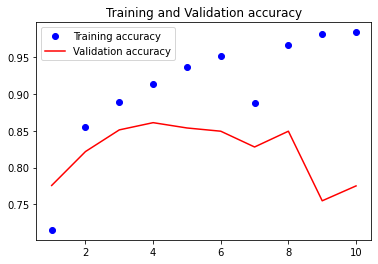

In [82]:
compare_plots_(train_acc, val_acc, 'accuracy')

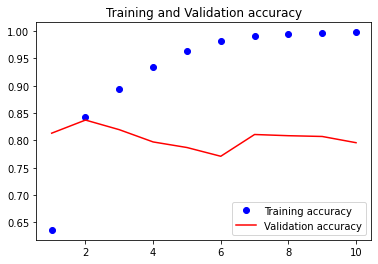

In [87]:
compare_plots_(train_acc, val_acc, 'accuracy')

### LSTM

In [88]:
from tensorflow.keras.layers import LSTM

In [89]:
model = Sequential()
model.add(Embedding(10000,32))
## Stacking of several recurrent layers to increase representational power of the network
## Intermediate RNN layers have to return sequences
model.add(LSTM(32,return_sequences=True))
#model.add(SimpleRNN(32,return_sequences=True))
#model.add(SimpleRNN(32,return_sequences=True))
#model.add(SimpleRNN(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, None, 32)          8320      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 336,673
Trainable params: 336,673
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
his = model.fit(x_train,y_train,epochs=10,batch_size=batch_size*4,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 51s 198ms/step - loss: 0.5771 - acc: 0.6842 - val_loss: 0.3281 - val_acc: 0.8644
Epoch 2/10
157/157 [==============================] - 28s 177ms/step - loss: 0.2897 - acc: 0.8865 - val_loss: 0.2928 - val_acc: 0.8786
Epoch 3/10
157/157 [==============================] - 28s 176ms/step - loss: 0.2307 - acc: 0.9132 - val_loss: 0.4328 - val_acc: 0.8526
Epoch 4/10
157/157 [==============================] - 29s 188ms/step - loss: 0.2002 - acc: 0.9265 - val_loss: 0.3234 - val_acc: 0.8908
Epoch 5/10
157/157 [==============================] - 31s 199ms/step - loss: 0.1655 - acc: 0.9386 - val_loss: 0.3024 - val_acc: 0.8740
Epoch 6/10
157/157 [==============================] - 32s 204ms/step - loss: 0.1393 - acc: 0.9507 - val_loss: 0.4306 - val_acc: 0.8800
Epoch 7/10
157/157 [==============================] - 32s 201ms/step - loss: 0.1370 - acc: 0.9515 - val_loss: 0.3966 - val_acc: 0.8808
Epoch 8/10
157/157 [==============================] - 3

In [91]:
train_acc = his.history['acc']
val_acc = his.history['val_acc']

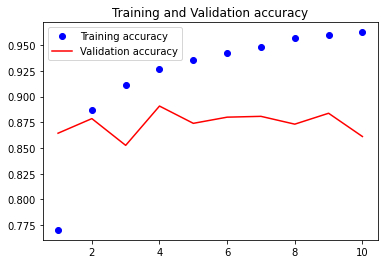

In [92]:
compare_plots_(train_acc, val_acc, 'accuracy')